Hi, I am a medical student in the process of an academic appeal involving a simulated patient practical exam. There are 5 locations where this exam took place and in those 5 locations, there were 5 rooms that contained 5 simulated patients (1 patient for each room).

A simulated patient practical exam involves a student being assigned to one of the 5 locations and when he or she arrives in that location they are further assigned to one of the 5 rooms. Once in the room, the student's task is to perform a physical exam and ask the patient questions in order to come up with a diagnosis (predetermined and known by the examiner). The issue I have is that the room I was assigned to had the wrong patient and this affected my score. The other rooms are assumed ok and that they received the correct patient.

I requested the exam results through the freedom of information Act and the school sent me data that is too broad for my basic level of statistics. I would like some indication that the results in my location as a whole had significant noise in the data when compared to the other locations.

The data I received will not divide into the 5 rooms per location, instead, they are just lumped up and grouped by date and location.

If you look at the data the 5 locations can be grouped by date and location. 
e.g 
Group 1 = 7/9/2019 and Non UK
Group 2 = 7/10/2019 and  UK
Group 3 = 7/10/2019 and Non UK
Group 4 = 7/11/2019 and UK
Group 5 = 7/11/2019 Non UK

I was in Group 3 (7/10/2019 and Non UK) and my grade was 47.5%. The official results had a range from 8.8 to 100%. A 74.9% mean and pass mark cut off 52.3%. The pass mark is a special formula the medical school uses. A score above the pass mark is a Pass (P). A score between the pass mark and 10% below (52.3-10 = 42.3%) is called a Cause for Concern (CC) and a score below 42.3% is a Fail (F). I received a cause for concern and I am making the argument that the patient I saw was wrong for my exam and that other students who went in to see the same patient I saw were also affected. But because I did not receive data split by room and location I am limited but this wrong patient issue happened in one location (group 3 ) and not any other group, so my hypothesis is that the distribution of data in Group 3, when compared to other groups, has a lot of noise that can suggest something was inconsistent in group 3 compared to what other students in other locations experienced.

Special notes
I tried to look at the data applying boxplot and DBSCAN analysis in python but I failed. I can not account for the noise in Group 3 because of the varying sample sizes in other groups and outliers. 

I should mention something important that could affect the scores: Since the groups are separated by date and location. It has been whispered that students on the 10th knew what patient would be present from the students on the 9th and the students on the 11th could technically have had 2 days to prepare.

Task
Could you come up with a statistical analysis in python that can support my hypothesis that there is sufficient variance or noise in the distribution of data in Group 3, taking into account the group size and time of the exam. If you can accomplish this I will need some visualization in python (standard, nothing fancy) that I will use in my appeal. Please help. 

In [1]:
#import necessary Libraries
import pandas as pd
import numpy as np 
from pylab import rcParams
!conda install seaborn --yes
import seaborn as sb
import matplotlib.pyplot as plt 

!conda install wget --yes
import wget

import sklearn
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from collections import Counter

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [2]:
#downloading data
!wget -O OSCE_results_analysis.zip https://www.dropbox.com/s/dhj73mj39eqx8qk/OSCE_results_analysis.zip?dl=0
print('unziping ...')
!unzip -o -j OSCE_results_analysis.zip 

--2020-01-27 15:47:13--  https://www.dropbox.com/s/dhj73mj39eqx8qk/OSCE_results_analysis.zip?dl=0
Resolving www.dropbox.com... 162.125.1.1
Connecting to www.dropbox.com|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dhj73mj39eqx8qk/OSCE_results_analysis.zip [following]
--2020-01-27 15:47:14--  https://www.dropbox.com/s/raw/dhj73mj39eqx8qk/OSCE_results_analysis.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd91c6c5d6c4494e7a327ee8ef5.dl.dropboxusercontent.com/cd/0/inline/Aw_BqmHlA0oIodTRT2k9x3De9Ku0ExgRHg_Rmhb_HAcJHmKe7c_TqmdyhD_Sh8zaCwx86ojECx2e3jlJZoG8YLHYK0-M7YyBcAu9rH_Bz7FMbzPNzAgHCyUCq5tR6ACabdI/file# [following]
--2020-01-27 15:47:14--  https://ucd91c6c5d6c4494e7a327ee8ef5.dl.dropboxusercontent.com/cd/0/inline/Aw_BqmHlA0oIodTRT2k9x3De9Ku0ExgRHg_Rmhb_HAcJHmKe7c_TqmdyhD_Sh8zaCwx86ojECx2e3jlJZoG8YLHYK0-M7YyBcAu9rH_Bz7FMbzPNzAgHCyUCq5tR6ACabdI/f

In [3]:
#Data containing the 5 locations
df_location = pd.read_csv("OSCE_Result_BoxPlot.csv")
df_location.head()

,Non_UK_1,UK_2,UNIc_3,UK_4,Non_UK_5
0,92.50,61.25,85.00,100.00,73.75
1,87.50,73.75,91.25,72.50,68.75
2,58.75,71.25,71.25,75.00,93.75
3,90.00,62.50,90.00,75.00,72.50
4,86.25,88.75,73.75,78.75,75.00


In [4]:
#Summary of 
df_location.describe()

,Non_UK_1,UK_2,UNIc_3,UK_4,Non_UK_5
count,43.000000,141.000000,60.000000,152.000000,25.000000
mean,81.569767,73.501773,77.979167,72.121711,79.750000
std,12.241655,15.431458,16.496808,16.467306,10.250762
min,48.750000,28.750000,37.500000,8.750000,46.250000
25%,73.125000,63.750000,69.687500,62.187500,75.000000
50%,83.750000,75.000000,81.875000,73.750000,80.000000
75%,89.375000,83.750000,91.562500,81.250000,88.750000
max,100.000000,100.000000,100.000000,100.000000,93.750000


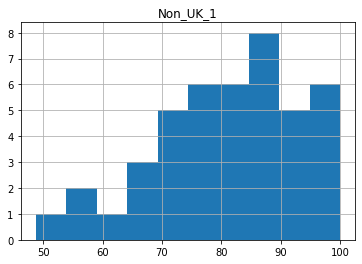

In [5]:
#Normal bell curve distribution
vizNon_UK_1 = df_location[['Non_UK_1']]
vizNon_UK_1.hist()
plt.show()

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


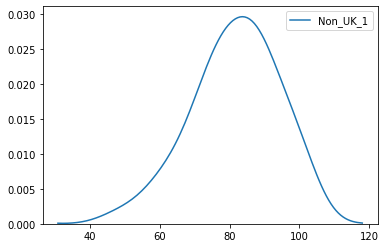

In [6]:
# library & dataset
import seaborn as sns
 
# Make default density plot
sns.kdeplot(df_location['Non_UK_1'])

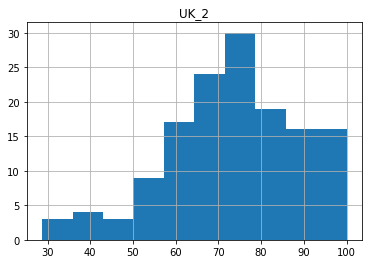

In [7]:
#Normal bell curve distribution
vizUK_2 = df_location[['UK_2']]
vizUK_2.hist()
plt.show()

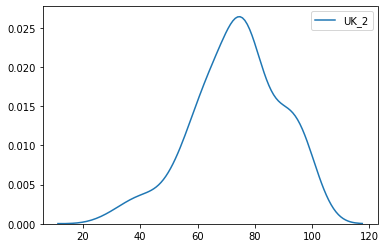

In [8]:
# library & dataset
import seaborn as sns
 
# Make default density plot
sns.kdeplot(df_location['UK_2'])

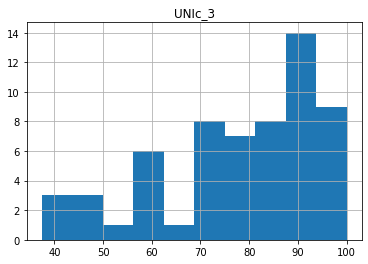

In [9]:
#This was my location
#Double hump curve distribution
#I imagine two distributions, the larger one from 60 to 100 and the smaller one from 40 to 60. It is this area 40 to 60 that I fell under and could be the place other students who were affected also fell under.
vizUNIc_3 = df_location[['UNIc_3']]
vizUNIc_3.hist()
plt.show()

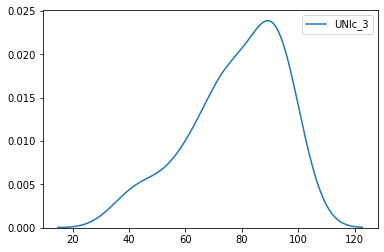

In [10]:
# library & dataset
import seaborn as sns
 
# Make default density plot
sns.kdeplot(df_location['UNIc_3'])

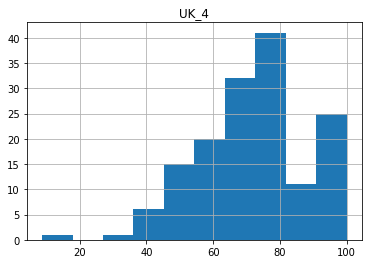

In [11]:
#Normal bell curve distribution
vizUK_4 = df_location[['UK_4']]
vizUK_4.hist()
plt.show()

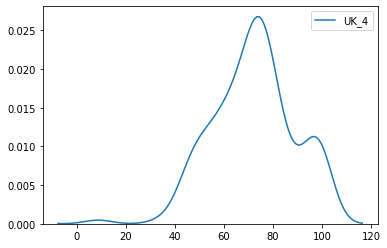

In [12]:
# library & dataset
import seaborn as sns
 
# Make default density plot
sns.kdeplot(df_location['UK_4'])

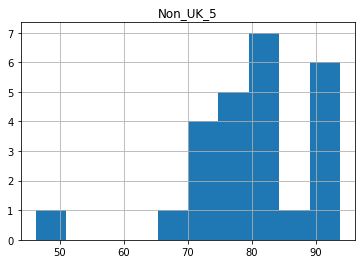

In [13]:
#Normal bell curve distribution
vizNon_UK_5 = df_location[['Non_UK_5']]
vizNon_UK_5.hist()
plt.show()

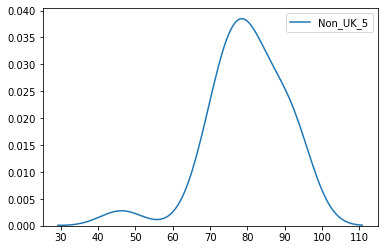

In [14]:
# library & dataset
import seaborn as sns
 
# Make default density plot
sns.kdeplot(df_location['Non_UK_5'])

In [15]:
#Results Data
#Location index in the data represents location. e,g location index 1 = Non_UK_1, 2 = UK_2, 3 = UNIc_3, 4 = UK_4, 5 = Non_UK_5
#UNIc_3 was my location and the location I hope noise can be found.
df = pd.read_csv("OSCE_Results.csv")

In [16]:
#Dataset summary
df_location.describe()

,Non_UK_1,UK_2,UNIc_3,UK_4,Non_UK_5
count,43.000000,141.000000,60.000000,152.000000,25.000000
mean,81.569767,73.501773,77.979167,72.121711,79.750000
std,12.241655,15.431458,16.496808,16.467306,10.250762
min,48.750000,28.750000,37.500000,8.750000,46.250000
25%,73.125000,63.750000,69.687500,62.187500,75.000000
50%,83.750000,75.000000,81.875000,73.750000,80.000000
75%,89.375000,83.750000,91.562500,81.250000,88.750000
max,100.000000,100.000000,100.000000,100.000000,93.750000


In [17]:
#Creating Dataset for DBSCAN
data = df.iloc[:,2:4]
target = df.iloc[:,2]
df[:4]

,date_of_hand_exam,location,location_index,station_score
0,7/9/2019,Non-UK,1,92.50
1,7/9/2019,Non-UK,1,87.50
2,7/9/2019,Non-UK,1,58.75
3,7/9/2019,Non-UK,1,90.00


In [18]:
#data summary
data.describe()

,location_index,station_score
count,421.000000,421.000000
mean,2.940618,74.836698
std,1.158319,15.711287
min,1.000000,8.750000
25%,2.000000,65.000000
50%,3.000000,75.000000
75%,4.000000,87.500000
max,5.000000,100.000000


In [19]:
#Warning ⚠️  - there is a label issue
# 'station_score ' has a space at the end do not try to use 'station_score'
data['station_score ']

0      92.50
1      87.50
2      58.75
3      90.00
4      86.25
       ...  
416    88.75
417    81.25
418    82.50
419    90.00
420    90.00
Name: station_score , Length: 421, dtype: float64

In [20]:
# 'station_score' will not work
#Expected Error
try:
  data['station_score']
except:
  print("'station_score' will not work, this was an expected Error")

'station_score' will not work, this was an expected Error


In [21]:
#DBSCAN
model = DBSCAN(eps = 0.8, min_samples = 19).fit(data)
print (model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


In [22]:
outliers_df = pd.DataFrame(data)
print (Counter(model.labels_))
print (outliers_df[model.labels_==-1])

Counter({-1: 402, 0: 19})
     location_index  station_score 
0                 1           92.50
1                 1           87.50
2                 1           58.75
3                 1           90.00
4                 1           86.25
..              ...             ...
416               5           88.75
417               5           81.25
418               5           82.50
419               5           90.00
420               5           90.00

[402 rows x 2 columns]


Text(0.5, 1.0, 'DBSCAN for Outlier Detention')

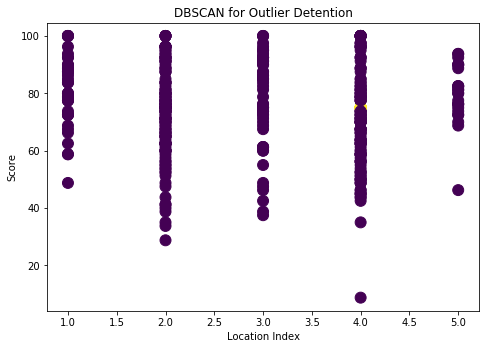

In [23]:
fig = plt.figure()

ax = fig.add_axes([.1,.1, 1, 1])

colors = model.labels_

ax.scatter(data['location_index'], data['station_score '],  c= colors, s=120)

ax.set_xlabel('Location Index')
ax.set_ylabel('Score')

plt.title('DBSCAN for Outlier Detention')

In [24]:
#Other helpful analysis

In [25]:
#Create Non_UK_1 Dataset
df_Non_UK_1 = df_location['Non_UK_1']
df_Non_UK_1.head()

0    92.50
1    87.50
2    58.75
3    90.00
4    86.25
Name: Non_UK_1, dtype: float64

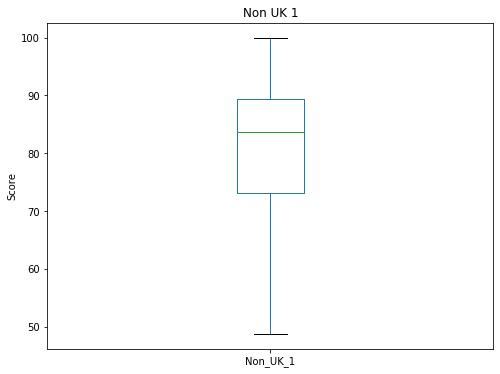

In [26]:
# Non_UK_1 Boxplot
df_Non_UK_1.plot(kind='box', figsize=(8, 6))
#df_Non_UK_1.plot(kind='box', notch='True', figsize=(8, 6))
plt.title('Non UK 1')
plt.ylabel('Score')

plt.show()


#plt.boxplot(box_plot_data,notch='True',patch_artist=True,labels=['course1','course2','course3','course4'])
#plt.show()

In [27]:
#Non_UK_1 Summary
df_Non_UK_1.describe()

count     43.000000
mean      81.569767
std       12.241655
min       48.750000
25%       73.125000
50%       83.750000
75%       89.375000
max      100.000000
Name: Non_UK_1, dtype: float64

In [28]:
#Non_UK_1 Variance and Standard Deviation
print(np.var(df_location.Non_UK_1))
print(np.std(df_location.Non_UK_1))

146.3730394808004
12.098472609416463


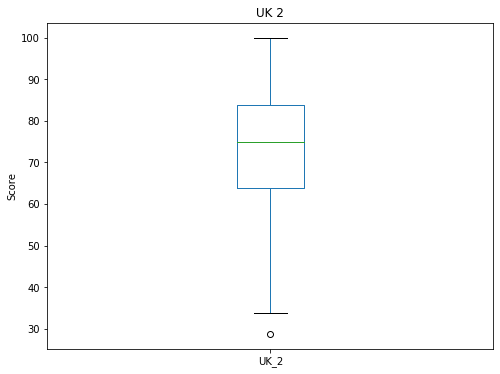

In [29]:
# UK_2 Boxplot
df_UK_2 = df_location['UK_2']
df_UK_2.head()

df_UK_2.plot(kind='box', figsize=(8, 6))

plt.title('UK 2')
plt.ylabel('Score')

plt.show()

In [30]:
#UK_2 Summary
df_UK_2.describe()

count    141.000000
mean      73.501773
std       15.431458
min       28.750000
25%       63.750000
50%       75.000000
75%       83.750000
max      100.000000
Name: UK_2, dtype: float64

In [31]:
#UK_2 Variance and Standard Deviation
print(np.var(df_location.UK_2))
print(np.std(df_location.UK_2))

236.44104295558574
15.376639520896163


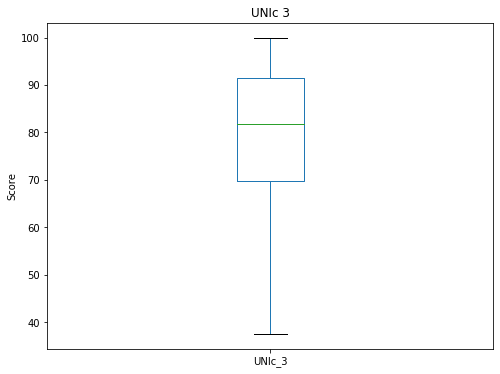

In [32]:
# UNIc_3 Boxplot
df_UNIc_3 = df_location['UNIc_3']
df_UNIc_3.head()

df_UNIc_3.plot(kind='box', figsize=(8, 6))

plt.title('UNIc 3')
plt.ylabel('Score')

plt.show()

In [33]:
#UNIc_3 Summary
df_UNIc_3.describe()

count     60.000000
mean      77.979167
std       16.496808
min       37.500000
25%       69.687500
50%       81.875000
75%       91.562500
max      100.000000
Name: UNIc_3, dtype: float64

In [34]:
#UNIc_3 Variance and Standard Deviation
#I was hoping my ,location UNIc_3 would have the largest variance and standard deviation but UK_4 did however I feel the UK-$ had a larger sample size at 152 and my location only had UNIc_3 = 60.
# A smaller sample size I think should have less noise in the exam type dataset.
print(np.var(df_location.UNIc_3))
print(np.std(df_location.UNIc_3))

267.60894097222223
16.358757317480514


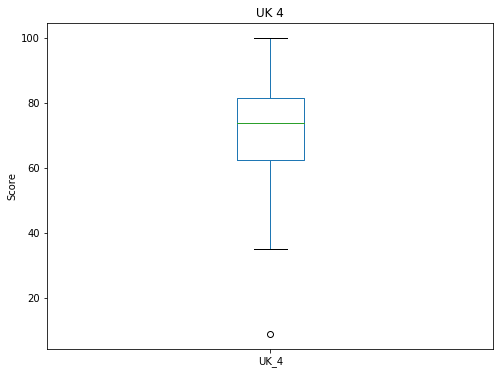

In [35]:
# UK_4 Boxplot
df_UK_4 = df_location['UK_4']
df_UK_4.head()

df_UK_4.plot(kind='box', figsize=(8, 6))

plt.title('UK 4')
plt.ylabel('Score')

plt.show()

In [36]:
#UK_4 Summary
df_UK_4.describe()

count    152.000000
mean      72.121711
std       16.467306
min        8.750000
25%       62.187500
50%       73.750000
75%       81.250000
max      100.000000
Name: UK_4, dtype: float64

In [37]:
#UK_4 Variance and Standard Deviation
print(np.var(df_location.UK_4))
print(np.std(df_location.UK_4))

269.38814707409955
16.41304807383746


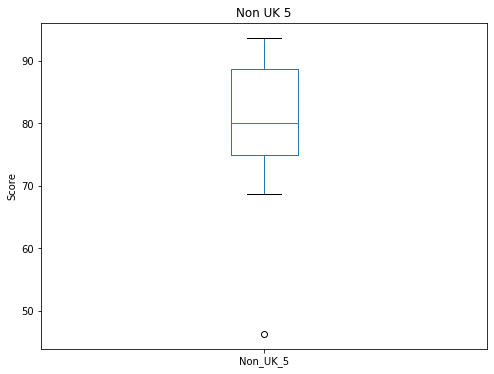

In [38]:
# Non_UK_5 Boxplot
df_Non_UK_5 = df_location['Non_UK_5']
df_Non_UK_5.head()

df_Non_UK_5.plot(kind='box', figsize=(8, 6))

plt.title('Non UK 5')
plt.ylabel('Score')

plt.show()

In [39]:
#Non_UK_5 Summary
df_Non_UK_5.describe()

count    25.000000
mean     79.750000
std      10.250762
min      46.250000
25%      75.000000
50%      80.000000
75%      88.750000
max      93.750000
Name: Non_UK_5, dtype: float64

In [40]:
#Non_UK_5 Variance and Standard Deviation
print(np.var(df_location.Non_UK_5))
print(np.std(df_location.Non_UK_5))

100.875
10.043654713300333


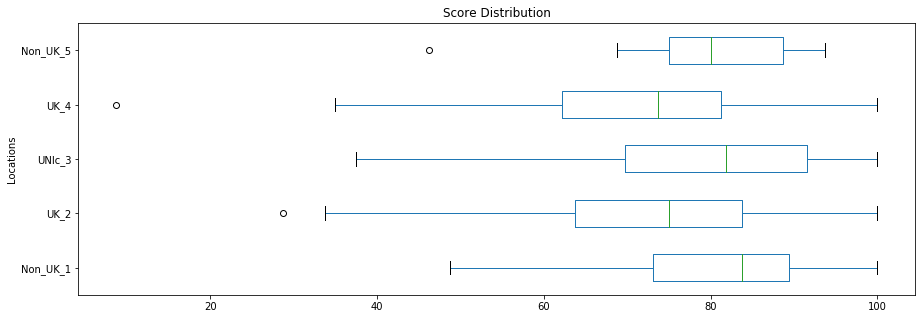

In [41]:
#All Locations Boxplot
df_location.plot(kind='box', figsize=(15, 5), vert=False)

plt.title('Score Distribution')
plt.ylabel('Locations')

plt.show()

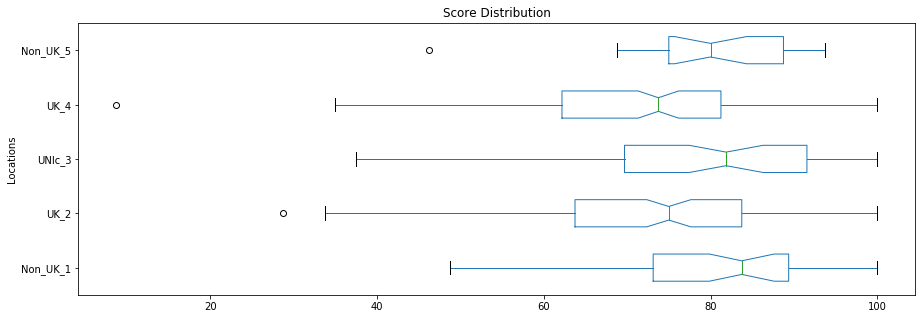

In [42]:
#All Locations Boxplot
df_location.plot(kind='box', notch='True', figsize=(15, 5), vert=False)

plt.title('Score Distribution')
plt.ylabel('Locations')

plt.show()

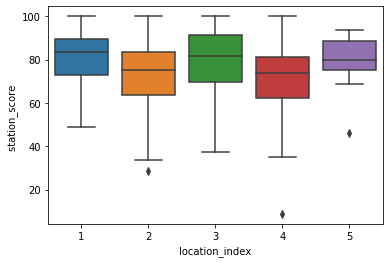

In [43]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
#df=a.append(b).append(c).append(d).append(e)
 
# Usual boxplot
sns.boxplot(x='location_index', y='station_score ', data=df)


In [44]:
df.head()

,date_of_hand_exam,location,location_index,station_score
0,7/9/2019,Non-UK,1,92.50
1,7/9/2019,Non-UK,1,87.50
2,7/9/2019,Non-UK,1,58.75
3,7/9/2019,Non-UK,1,90.00
4,7/9/2019,Non-UK,1,86.25


Text(0.0, 1.0, 'Violin plot')

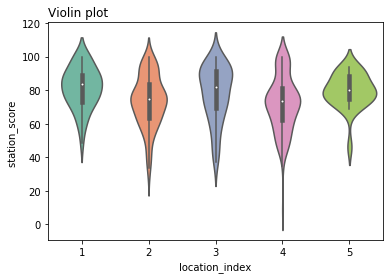

In [45]:
sns.violinplot( x='location_index', y='station_score ', data=df, palette="Set2", height=2, aspect=3)
plt.title("Violin plot", loc="left")


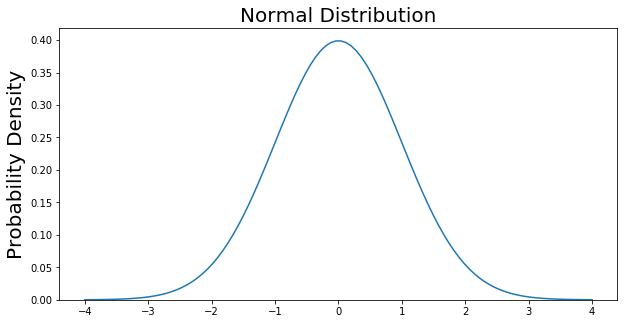

In [46]:
# Import all libraries for this portion of the blog post
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);

In [47]:
# Make PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
# Integrate PDF from -.6745 to .6745
result_50p, _ = quad(normalProbabilityDensity, -.6745, .6745, limit = 1000)
print(result_50p)

0.5000065142726018


In [48]:
# Make a PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
# Integrate PDF from -2.698 to 2.698
result_99_3p, _ = quad(normalProbabilityDensity,
                     -2.698,
                     2.698,
                     limit = 1000)
print(result_99_3p)

0.9930242559336101


In [49]:
df_Non_UK_5[0]

73.75

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


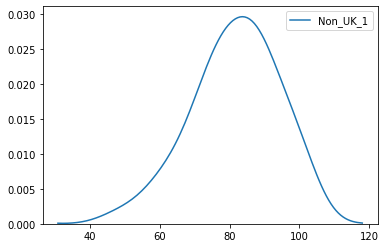

In [50]:
# library & dataset
import seaborn as sns
 
# Make default density plot
sns.kdeplot(df_location['Non_UK_1'])


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


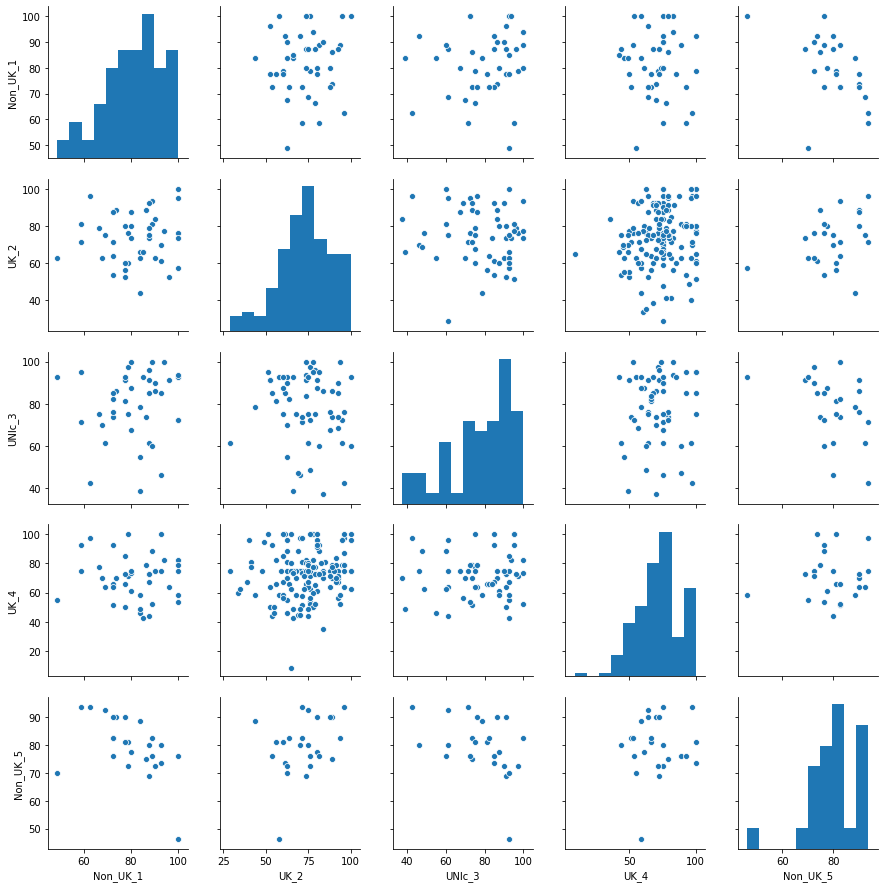

In [51]:
# library & dataset
import seaborn as sns
#df = sns.load_dataset('iris')
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(df_location)
plt.show()


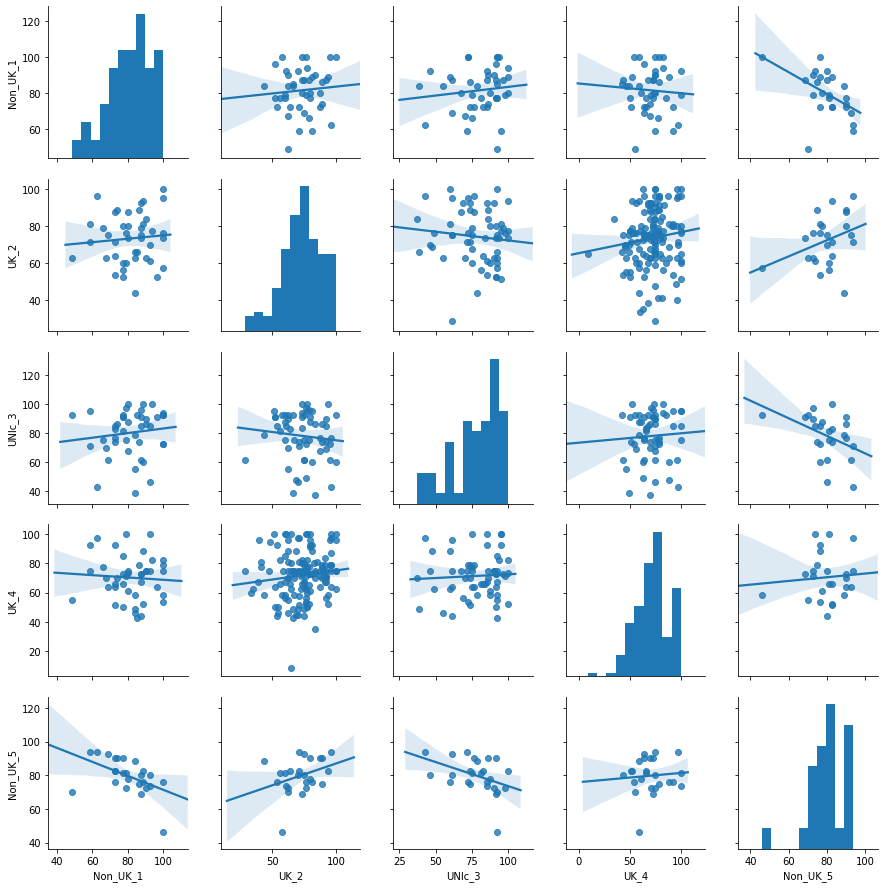

In [52]:
# with regression
sns.pairplot(df_location, kind="reg")
plt.show()

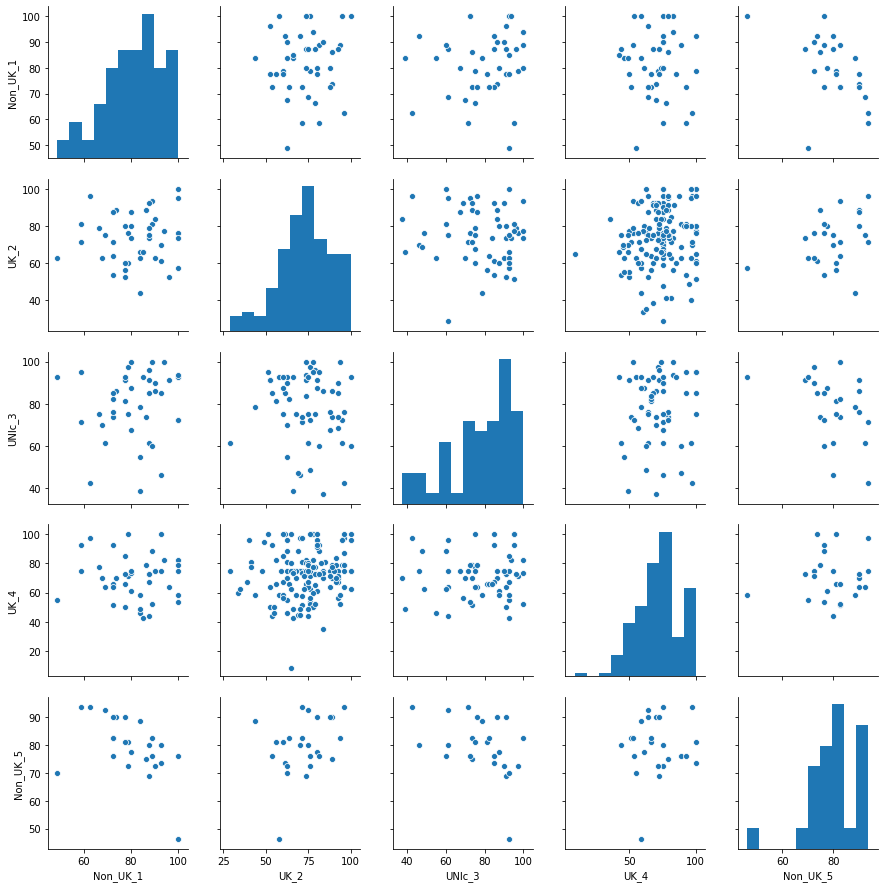

In [53]:
# without regression
sns.pairplot(df_location, kind="scatter")
plt.show()

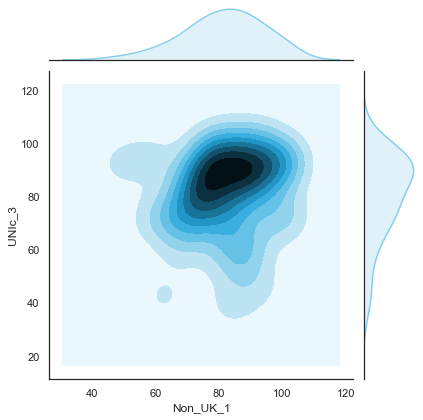

In [54]:
# Custom the color
sns.set(style="white", color_codes=True)
sns.jointplot(x=df_location["Non_UK_1"], y=df_location["UNIc_3"], kind='kde', color="skyblue")


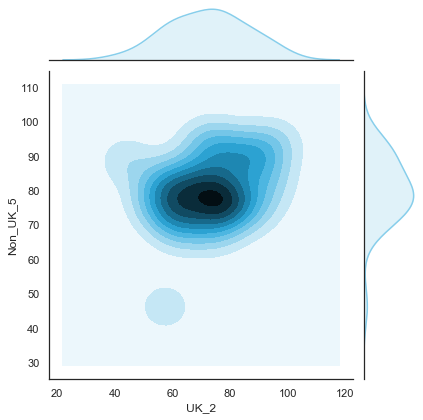

In [55]:
# Custom the color
sns.set(style="white", color_codes=True)
sns.jointplot(x=df_location["UK_2"], y=df_location["Non_UK_5"], kind='kde', color="skyblue")



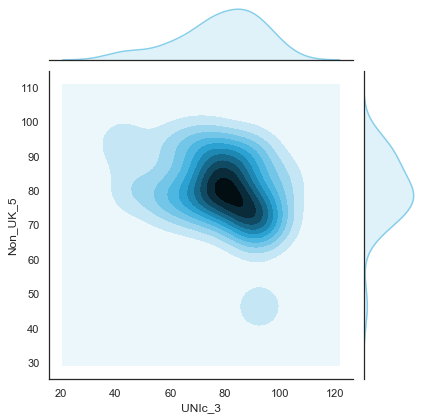

In [56]:
# Custom the color
sns.set(style="white", color_codes=True)
sns.jointplot(x=df_location["UNIc_3"], y=df_location["Non_UK_5"], kind='kde', color="skyblue")

